<a href="https://colab.research.google.com/github/compi1234/pyspch/blob/master/test/spectrogram_test_ly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spectrogram Plotting with plotly

Requirements:   
- plotly >= 4.12   
- pyspch

You may need to install following packages
> !pip install plotly=4.12   
> !pip install git+https://github.com/compi1234/pyspch.git

In Jupyter lab you need to install a plotly extension (for a version >= 4.12.0)
> jupyter labextension install jupyterlab-plotly@4.14.3

If you hadn't done so before, you should actually should include the ipywidgets extension as well 
> jupyter labextension install @jupyter-widgets/jupyterlab-manager plotlywidget@4.14.3

If in doubt on you local plotly setup, check:  https://plotly.com/python/getting-started/

In [1]:
# You may need to install following packages
# !pip install git+https://github.com/compi1234/pyspch.git
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

In [2]:
import os,sys 
import numpy as np
import pandas as pd
from IPython.display import display, Audio, HTML, clear_output
import ipywidgets as widgets

import plotly 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
#
import pyspch.spectrogram as specg
import pyspch.audio as audio
import pyspch.utils as spch
import pyspch.display_ly as spch_disp

In [3]:
print(plotly.__version__)
# you may need to set a new default renderer
# in Jupyter lab the automatic detection doesn't work flawless
# it starts up with 'plotly_mimetype+notebook'
import plotly.io as pio
#pio.renderers.default='notebook'
#pio.renderers.default='jupyterlab'
#pio.renderers.default='plotly_mimetype'
pio.renderers.default

4.12.0


'plotly_mimetype+notebook'

In [4]:
# set basename and directories
dir='https://homes.esat.kuleuven.be/~spchlab/data/'
file = "timit/si1027" #@param {type:"string"}
basename = dir+file
wavfname = basename + ".wav"
wrdfname = basename + ".wrd"
phnfname = basename + ".phn"
phone_mapping = "timit/phones-61-48-39.txt" #@param {type:"string"}

# 1. read the waveform data
wavdata, sr = audio.load(wavfname)

# 2. compute spectrograms
f_shift = 0.01
spgdata = specg.spectrogram(wavdata,sample_rate=sr,f_shift=f_shift,n_mels=None)
(nparam,nfr) = spgdata.shape
spg80 = specg.spectrogram(wavdata,sample_rate=sr,f_shift=f_shift,n_mels=80)

# 3. get segmentations
segwrd = pd.read_csv(wrdfname,delim_whitespace=True,names=['t0','t1','seg'])
segphn61 = pd.read_csv(phnfname,delim_whitespace=True,names=['t0','t1','seg'])
# convert TIMIT61 to TIMIT39
# this routine is not great as it simply maps closures to silence instead to combining
phone_tbl = pd.read_csv(dir+phone_mapping,delim_whitespace=True,names=['T61','T48','T39'])
map61_48 = dict(zip(phone_tbl['T61'],phone_tbl['T48']))
segphn = segphn61.replace({"seg": map61_48})
# convert TIMIT sample based segmentations to time based segmentations
segphn['t0']=specg.indx2t(segphn['t0'],1./sr)
segphn['t1']=specg.indx2t(segphn['t1'],1./sr)
segwrd['t0']=specg.indx2t(segwrd['t0'],1./sr)
segwrd['t1']=specg.indx2t(segwrd['t1'],1./sr)

### 1. Elementary Waveform and Heatmap plotting using plotly

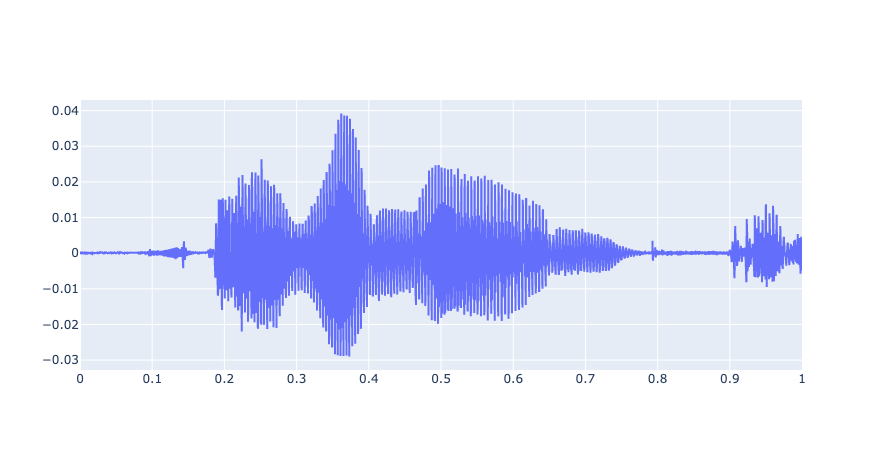

In [7]:
wave_go = go.Scatter(y=wavdata[0:16000], dx=1./sr,
                  showlegend=False,
                  hoverinfo="x+y",
                 )
fig_wav = go.Figure(wave_go)
fig_wav.show()
# in a plotly figure you can find the exact datapoints by hovering over the data
# just zoom in on the data around 0.01 sec to verify with
# wavdata[150:160]

In [8]:
f=go.FigureWidget(fig_wav)
f

FigureWidget({
    'data': [{'dx': 6.25e-05,
              'hoverinfo': 'x+y',
              'showlegend': Fal…

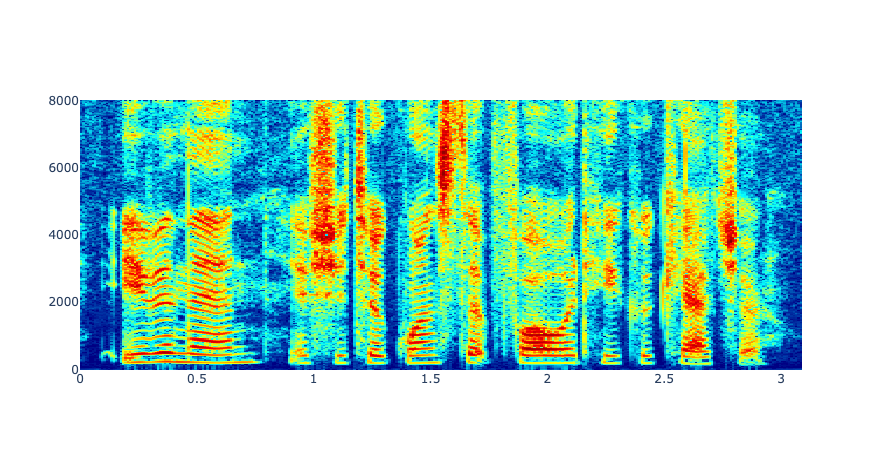

CPU times: user 836 ms, sys: 18.4 ms, total: 854 ms
Wall time: 871 ms


In [6]:
%%time
spg_go = go.Heatmap(z=spgdata,dx=f_shift,x0=f_shift/2.,dy=sr/(2*(nparam-1)),
                 colorscale='Jet',
                 showscale=False,
                 showlegend=False,
                 hoverinfo="x+y+z",
                 name='Spectrogram',
                 text=spgdata)
go.Figure(spg_go).show()

In [ ]:
%%time
fig = spch_disp.plot_spg(spgdata,wav=wavdata,sample_rate=sr,f_shift=f_shift)
fig.show()

In [ ]:
%%time
Rangeslider=True
fig = spch_disp.plot_spg(spgdata,wav=wavdata,sample_rate=sr,f_shift=f_shift,segwav=segwrd,segspg=segphn)
if(Rangeslider):
    fig['layout']['xaxis2'].update(title='Time(sec)',
                               type='linear',
                               rangeslider=dict(visible=True,borderwidth=2,bgcolor="#bbb"), 
                               showgrid=False)
fig.show()